In [87]:
import os

In [88]:
df = 'C:\\Users\\Bellemiss972\\Desktop\\Python-dataset\\Cancer du poumon'

In [89]:
os.listdir(df)

['test', 'train']

In [90]:
#charger les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from matplotlib.image import imread

In [92]:
test_set = df+'\\test\\'
train_set = df+'\\train\\'

In [93]:
test_set

'C:\\Users\\Bellemiss972\\Desktop\\Python-dataset\\Cancer du poumon\\test\\'

In [94]:
os.listdir(test_set)

['cancereux', 'normal']

In [95]:
os.listdir(train_set+'cancereux')[0]

'person1_bacteria_1.jpeg'

In [96]:
cancer_cell= train_set+'cancereux\\'+'person1_bacteria_1.jpeg'

In [97]:
cancer_cell

'C:\\Users\\Bellemiss972\\Desktop\\Python-dataset\\Cancer du poumon\\train\\cancereux\\person1_bacteria_1.jpeg'

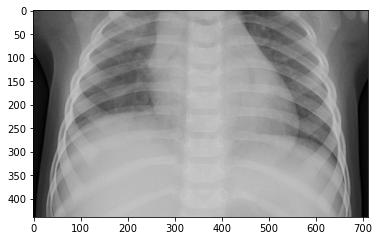

In [98]:
plt.imshow(imread(cancer_cell))

In [99]:
os.listdir(train_set+'normal')[0]

'IM-0115-0001.jpeg'

In [100]:
normal_cel= train_set+'normal\\'+'IM-0115-0001.jpeg'

In [101]:
normal_cell=imread(normal_cel)

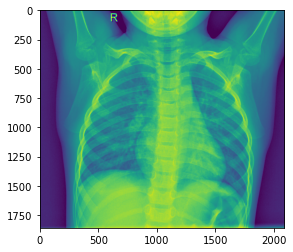

In [102]:
plt.imshow(normal_cell)

In [103]:
pwd

'C:\\Users\\Bellemiss972\\Desktop'

In [104]:
len(os.listdir(train_set+'cancereux'))

18

In [105]:
len(os.listdir(train_set+'normal'))

18

In [106]:
dim1=[]
dim2=[]


for image_filename in os.listdir(test_set+'normal'):
    
    img = imread(test_set+'normal\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
   
    

In [107]:
dim1

[1317,
 1509,
 1837,
 1326,
 1818,
 1443,
 1478,
 1916,
 1945,
 1785,
 2155,
 1238,
 2057,
 1559,
 1432,
 1893,
 617,
 1384]

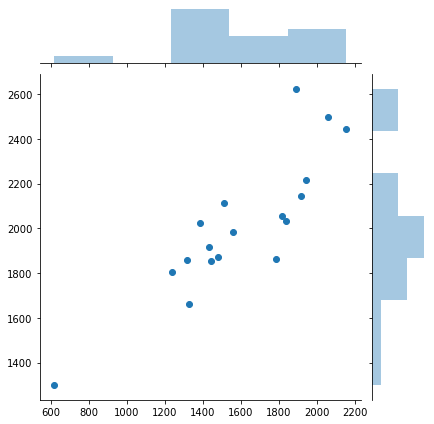

In [108]:
sns.jointplot(dim1,dim2)

In [109]:
np.mean(dim1)

1594.9444444444443

In [110]:
np.mean(dim2)

2014.0555555555557

In [111]:
image_shape = (1594,2014,1)

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [113]:
image_gen =ImageDataGenerator(zoom_range=0.1,
                             rescale=1/255,
                             fill_mode='nearest')

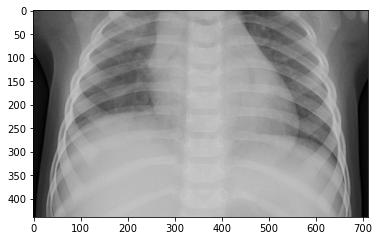

In [114]:
cancer_img= imread(cancer_cell)
plt.imshow(cancer_img)

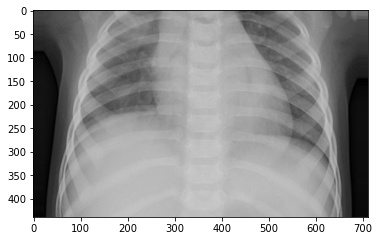

In [115]:
plt.imshow(image_gen.random_transform(cancer_img))

In [116]:
image_gen.flow_from_directory(train_set)

Found 36 images belonging to 2 classes.


In [117]:
image_gen.flow_from_directory(test_set)

Found 36 images belonging to 2 classes.


In [118]:
from tensorflow.keras.models import Sequential

In [119]:
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Dropout, Conv2D

In [122]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten())
          
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.5))
          
model.add(Dense(1,activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
early_stop = EarlyStopping(monitor='val loss', patience=2)

In [125]:
batch_size = 16

In [128]:
image_shape[:2]

(1594, 2014)

In [129]:
train_image_gen = image_gen.flow_from_directory(train_set, target_size=image_shape[:2],
                                               color_mode='grayscale', batch_size=batch_size,
                                               class_mode='binary')

Found 36 images belonging to 2 classes.


In [130]:
test_image_gen = image_gen.flow_from_directory(test_set, target_size=image_shape[:2],
                                               color_mode='grayscale', batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 36 images belonging to 2 classes.


In [131]:
train_image_gen.class_indices

{'cancereux': 0, 'normal': 1}

In [ ]:
results =model.ft